# Talktorial 11 (part A)

# CADD web services that can be used via a Python API

__Developed at AG Volkamer, Charité__

Dr. Jaime Rodríguez-Guerra

## Aim of this talktorial

Web services are a convenient way of using software because it frees the user from any installation hassles. A web UI is usually available for easy usage, at the cost of losing the possibility to automate a workflow. Fortunately, the number of web services that provide an API for automated access has been increasing. Some examples in the field of Computer Aided Drug Design include:

- ChEMBL
- RCSB PDB
- KLIFS
- Proteins.plus
- SwissDock

In this notebook, you will learn how to programmatically use online web-services from Python, always in the context of drug design. The end goal will be to build a full pipeline that exclusively relies on web-services, without (almost) any local execution!

__Note__: For simplicity, the full lesson will be divided in three notebooks:

- 11a. Querying KLIFS & PubChem for potential kinase inhibitors
- 11b. Docking the candidates against the target obtained in 11a
- 11c. Assessing the results and comparing against known data

## Learning goals

### Theory

- Types of programmatic access
- Description of the pipeline and the involved webservices

### Practical

- Building the pipeline
- Case study: EGFR inhibitors

### Discussion

Pending.

### Quiz

Pending.

***


# Theory

## Types of programmatic access

### Programmatic APIs

Modern webservices are able to provide standardized ways to access their data, especially when it comes to databases. This usually means that you can access a specific URL in their site to request results that are __machine readable__.

For example, [UniProt](https://www.uniprot.org/) is a database for all types of information concerning proteins. If you look for a specific protein, like `Src` (involved in cancer), you will arrive to [this beautiful webpage](https://www.uniprot.org/uniprot/P12931) with well organized content sections. If you add `.fasta` to the URL, however, you will obtain the protein sequence in `FASTA` format.

```
https://www.uniprot.org/uniprot/P12931 -> https://www.uniprot.org/uniprot/P12931.fasta
---

>sp|P12931|SRC_HUMAN Proto-oncogene tyrosine-protein kinase Src OS=Homo sapiens OX=9606 GN=SRC PE=1 SV=3
MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADGHRGPSAAFAPAAAE
PKLFGGFNSSDTVTSPQRAGPLAGGVTTFVALYDYESRTETDLSFKKGERLQIVNNTEGD
WWLAHSLSTGQTGYIPSNYVAPSDSIQAEEWYFGKITRRESERLLLNAENPRGTFLVRES
ETTKGAYCLSVSDFDNAKGLNVKHYKIRKLDSGGFYITSRTQFNSLQQLVAYYSKHADGL
CHRLTTVCPTSKPQTQGLAKDAWEIPRESLRLEVKLGQGCFGEVWMGTWNGTTRVAIKTL
KPGTMSPEAFLQEAQVMKKLRHEKLVQLYAVVSEEPIYIVTEYMSKGSLLDFLKGETGKY
LRLPQLVDMAAQIASGMAYVERMNYVHRDLRAANILVGENLVCKVADFGLARLIEDNEYT
ARQGAKFPIKWTAPEAALYGRFTIKSDVWSFGILLTELTTKGRVPYPGMVNREVLDQVER
GYRMPCPPECPESLHDLMCQCWRKEPEERPTFEYLQAFLEDYFTSTEPQYQPGENL

```

This is a way to provide programmatic access to a webservice: through specific URL schemes. However, each webservice would have to come up with their own scheme, which will force the developers to implement their scripts in case-by-case basis.

Fortunately, there are some standardized ways to provide this kind of programmatic access:

- HTTP-based RESTful APIs ([wiki](https://en.wikipedia.org/wiki/Representational_state_transfer#Applied_to_Web_services)).
- GraphQL
- SOAP
- gRPC

In this notebook, we will only discuss REST APIs

#### HTTP-based RESTful APIs

This type of programmatic access/provision defines a specific entry point for clients (scripts, libraries, programs) that require programmatic access, something like `api.webservice.com`. They can be versioned, so the provider can update the scheme without disrupting existing implementations (`api.webservice.com/v1` will still work even when `api.webservice.com/v2` has been deployed).

This kind of APIs are usually accompanyed by well-written documentation explaining all the available actions in the platform. For example, look at the [GitHub REST API for listing repositories](https://developer.github.com/v3/repos/#list-organization-repositories). You can see how every argument and option is documented, along with usage examples. 

The only difficulty is to build the needed URLs in the correct way:

```
https://api.github.com/users/volkamerlab/repos
```

<details>
    <summary>
        Returns
    </summary>

```
[
  {
    "id": 156864288,
    "node_id": "MDEwOlJlcG9zaXRvcnkxNTY4NjQyODg=",
    "name": "TeachOpenCADD",
    "full_name": "volkamerlab/TeachOpenCADD",
    "private": false,
    "owner": {
      "login": "volkamerlab",
      "id": 44878588,
      "node_id": "MDEyOk9yZ2FuaXphdGlvbjQ0ODc4NTg4",
      "avatar_url": "https://avatars2.githubusercontent.com/u/44878588?v=4",
      "gravatar_id": "",
      "url": "https://api.github.com/users/volkamerlab",
      "html_url": "https://github.com/volkamerlab",
      "followers_url": "https://api.github.com/users/volkamerlab/followers",
      "following_url": "https://api.github.com/users/volkamerlab/following{/other_user}",
      "gists_url": "https://api.github.com/users/volkamerlab/gists{/gist_id}",
      "starred_url": "https://api.github.com/users/volkamerlab/starred{/owner}{/repo}",
      "subscriptions_url": "https://api.github.com/users/volkamerlab/subscriptions",
      "organizations_url": "https://api.github.com/users/volkamerlab/orgs",
      "repos_url": "https://api.github.com/users/volkamerlab/repos",
      "events_url": "https://api.github.com/users/volkamerlab/events{/privacy}",
      "received_events_url": "https://api.github.com/users/volkamerlab/received_events",
      "type": "Organization",
      "site_admin": false
    },
    "html_url": "https://github.com/volkamerlab/TeachOpenCADD",
    "description": "TeachOpenCADD: a teaching platform for computer-aided drug design (CADD) using open source packages and data",
    "fork": false,
    "url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD",
    "forks_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/forks",
    "keys_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/keys{/key_id}",
    "collaborators_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/collaborators{/collaborator}",
    "teams_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/teams",
    "hooks_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/hooks",
    "issue_events_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/issues/events{/number}",
    "events_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/events",
    "assignees_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/assignees{/user}",
    "branches_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/branches{/branch}",
    "tags_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/tags",
    "blobs_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/git/blobs{/sha}",
    "git_tags_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/git/tags{/sha}",
    "git_refs_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/git/refs{/sha}",
    "trees_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/git/trees{/sha}",
    "statuses_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/statuses/{sha}",
    "languages_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/languages",
    "stargazers_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/stargazers",
    "contributors_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/contributors",
    "subscribers_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/subscribers",
    "subscription_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/subscription",
    "commits_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/commits{/sha}",
    "git_commits_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/git/commits{/sha}",
    "comments_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/comments{/number}",
    "issue_comment_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/issues/comments{/number}",
    "contents_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/contents/{+path}",
    "compare_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/compare/{base}...{head}",
    "merges_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/merges",
    "archive_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/{archive_format}{/ref}",
    "downloads_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/downloads",
    "issues_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/issues{/number}",
    "pulls_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/pulls{/number}",
    "milestones_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/milestones{/number}",
    "notifications_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/notifications{?since,all,participating}",
    "labels_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/labels{/name}",
    "releases_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/releases{/id}",
    "deployments_url": "https://api.github.com/repos/volkamerlab/TeachOpenCADD/deployments",
    "created_at": "2018-11-09T13:15:15Z",
    "updated_at": "2019-07-18T02:36:48Z",
    "pushed_at": "2019-05-03T15:02:03Z",
    "git_url": "git://github.com/volkamerlab/TeachOpenCADD.git",
    "ssh_url": "git@github.com:volkamerlab/TeachOpenCADD.git",
    "clone_url": "https://github.com/volkamerlab/TeachOpenCADD.git",
    "svn_url": "https://github.com/volkamerlab/TeachOpenCADD",
    "homepage": null,
    "size": 28121,
    "stargazers_count": 39,
    "watchers_count": 39,
    "language": "Jupyter Notebook",
    "has_issues": true,
    "has_projects": true,
    "has_downloads": true,
    "has_wiki": true,
    "has_pages": false,
    "forks_count": 13,
    "mirror_url": null,
    "archived": false,
    "disabled": false,
    "open_issues_count": 0,
    "license": {
      "key": "cc-by-4.0",
      "name": "Creative Commons Attribution 4.0 International",
      "spdx_id": "CC-BY-4.0",
      "url": "https://api.github.com/licenses/cc-by-4.0",
      "node_id": "MDc6TGljZW5zZTI1"
    },
    "forks": 13,
    "open_issues": 0,
    "watchers": 39,
    "default_branch": "master"
  }
]
```
</details>

, which happens to be a [JSON](https://en.wikipedia.org/wiki/JSON)-formatted dictionary! This is easily parsed into a Python dictionary using the `json` library. The best news is that you don't even need that. Using `requests` the following operation can be done in three lines:

In [4]:
import requests

response = requests.get("https://api.github.com/users/volkamerlab/repos")
response.raise_for_status()
result = response.json()
result

[{'id': 156864288,
  'node_id': 'MDEwOlJlcG9zaXRvcnkxNTY4NjQyODg=',
  'name': 'TeachOpenCADD',
  'full_name': 'volkamerlab/TeachOpenCADD',
  'private': False,
  'owner': {'login': 'volkamerlab',
   'id': 44878588,
   'node_id': 'MDEyOk9yZ2FuaXphdGlvbjQ0ODc4NTg4',
   'avatar_url': 'https://avatars2.githubusercontent.com/u/44878588?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/volkamerlab',
   'html_url': 'https://github.com/volkamerlab',
   'followers_url': 'https://api.github.com/users/volkamerlab/followers',
   'following_url': 'https://api.github.com/users/volkamerlab/following{/other_user}',
   'gists_url': 'https://api.github.com/users/volkamerlab/gists{/gist_id}',
   'starred_url': 'https://api.github.com/users/volkamerlab/starred{/owner}{/repo}',
   'subscriptions_url': 'https://api.github.com/users/volkamerlab/subscriptions',
   'organizations_url': 'https://api.github.com/users/volkamerlab/orgs',
   'repos_url': 'https://api.github.com/users/volkamerlab/re

If you parameterize the URL with a `f-string`, then you can design a function that will list the repositories of any user:

In [5]:
def repos(username):
    response = requests.get(f"https://api.github.com/users/{username}/repos")
    response.raise_for_status()
    return response.json()

repos("volkamerlab")

[{'id': 156864288,
  'node_id': 'MDEwOlJlcG9zaXRvcnkxNTY4NjQyODg=',
  'name': 'TeachOpenCADD',
  'full_name': 'volkamerlab/TeachOpenCADD',
  'private': False,
  'owner': {'login': 'volkamerlab',
   'id': 44878588,
   'node_id': 'MDEyOk9yZ2FuaXphdGlvbjQ0ODc4NTg4',
   'avatar_url': 'https://avatars2.githubusercontent.com/u/44878588?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/volkamerlab',
   'html_url': 'https://github.com/volkamerlab',
   'followers_url': 'https://api.github.com/users/volkamerlab/followers',
   'following_url': 'https://api.github.com/users/volkamerlab/following{/other_user}',
   'gists_url': 'https://api.github.com/users/volkamerlab/gists{/gist_id}',
   'starred_url': 'https://api.github.com/users/volkamerlab/starred{/owner}{/repo}',
   'subscriptions_url': 'https://api.github.com/users/volkamerlab/subscriptions',
   'organizations_url': 'https://api.github.com/users/volkamerlab/orgs',
   'repos_url': 'https://api.github.com/users/volkamerlab/re

#### Generating a client for any API

Did you find that convenient? Well, we are not done yet!

The REST API schema can be expressed programmatically in a document called "Swagger/OpenAPI definitions", which allows to dynamically generate a Python client for any REST API that implements the Swagger/OpenAPI schema. [This the one for GitHub](https://api.apis.guru/v2/specs/github.com/v3/swagger.json).

Of course, there are libraries for doing that in Python:

- `bravado`
- `agithub`

Using Bravado:

In [8]:
from bravado.client import SwaggerClient
GITHUB_SWAGGER = "https://api.apis.guru/v2/specs/github.com/v3/swagger.json"
client = SwaggerClient.from_url(GITHUB_SWAGGER)
client

SwaggerClient(https://api.github.com/)

Then, you can have fun inspecting the `client` object for all the API actions as methods. We will see an actual example with [KLIFS](http://klifs.vu-compmedchem.nl) in the case study.

__Tip__: Use `client?` to inspect the client in this Notebook.

Other standards like SOAP operate on a very similar principle: all you need to provide is a definition file to be processed by a client-generating library. For SOAP, the definition files are formatted as `.wsdl`. One of the most popular libraries is `suds` (now installable as `suds-community`).

In [49]:
import suds.client
wsdl = 'http://www.swissdock.ch/soap/wsdl'
client = suds.client.Client(wsdl)
# Suds does not populate the __docstring__ (accessed via ?), but overloads the __str__() method
# In other words, you have to "print" the object to get the documentation
print(client)


Suds ( https://fedorahosted.org/suds/ )  version: 0.8.3

Service ( SwissdockInterfaceWrapper ) tns="http://swissdock.vital-it.ch/soap/"
   Prefixes (1)
      ns0 = "http://swissdock.vital-it.ch/soap/"
   Ports (1):
      (SwissdockInterfaceWrapper)
         Methods (21):
            forget(xs:string jobID)
            getNewDockingPool()
            getPredictedDocking(xs:string jobID)
            getPredictedDockingAllFiles(xs:string jobID)
            getPredictedDockingFile(xs:string jobID, xs:string filename)
            getPredictedDockingPool(xs:string dockingPoolID, xs:boolean mergedock4)
            getPredictedDockingPoolFile(xs:string dockingPoolID, xs:string filename)
            getPreparedLigand(xs:string jobID)
            getPreparedTarget(xs:string jobID)
            isDockingKnown(xs:string jobID)
            isDockingPoolKnown(xs:string jobID)
            isDockingPoolRunning(xs:string currentPoolID)
            isDockingPoolTerminated(xs:string currentPoolID)
      

### Document parsing

Sometimes you won't be as lucky and the webservice won't provide a standardized API that produces machine-readable documents. Instead, you will have to use the regular webpage and parse through the HTML code to obtain the information you need. This is called (web) __scraping__, which usually involves finding the right HTML tags and IDs that contain the valuable data (ignoring things such as the sidebars, top menus, footers, ads, etc).

In scraping, you basically do two things:

1. Access the webpage with `requests` and obtain the HTML contents.
2. Parse the HTML string with `BeautifulSoup` or `requests-html`.


Let's parse the proteinogenic amino acids table in this [Wikipedia article](https://en.wikipedia.org/wiki/Proteinogenic_amino_acid):

In [50]:
import requests
from bs4 import BeautifulSoup

r = requests.get("https://en.wikipedia.org/wiki/Proteinogenic_amino_acid")
r.raise_for_status()

# To guess the correct steps here, you will have to inspect the HTML code by hand
# Tip: use right-click + inspect content in any webpage to land in the HTML definition ;)
html = BeautifulSoup(r.text)
header = html.find('span', id="General_chemical_properties")
table = header.find_all_next()[4]
table_body = table.find('tbody')

data = []
for row in table_body.find_all('tr'):
    cells = row.find_all('td')
    if cells:
        data.append([])
    for cell in cells:
        cell_content = cell.text.strip()
        try:  # convert to float if possible
            cell_content = float(cell_content)
        except ValueError:
            pass
        data[-1].append(cell_content)
data

[['A', 'Ala', 89.09404, 6.01, 2.35, 9.87],
 ['C', 'Cys', 121.15404, 5.05, 1.92, 10.7],
 ['D', 'Asp', 133.10384, 2.85, 1.99, 9.9],
 ['E', 'Glu', 147.13074, 3.15, 2.1, 9.47],
 ['F', 'Phe', 165.19184, 5.49, 2.2, 9.31],
 ['G', 'Gly', 75.06714, 6.06, 2.35, 9.78],
 ['H', 'His', 155.15634, 7.6, 1.8, 9.33],
 ['I', 'Ile', 131.17464, 6.05, 2.32, 9.76],
 ['K', 'Lys', 146.18934, 9.6, 2.16, 9.06],
 ['L', 'Leu', 131.17464, 6.01, 2.33, 9.74],
 ['M', 'Met', 149.20784, 5.74, 2.13, 9.28],
 ['N', 'Asn', 132.11904, 5.41, 2.14, 8.72],
 ['O', 'Pyl', 255.31, '?', '?', '?'],
 ['P', 'Pro', 115.13194, 6.3, 1.95, 10.64],
 ['Q', 'Gln', 146.14594, 5.65, 2.17, 9.13],
 ['R', 'Arg', 174.20274, 10.76, 1.82, 8.99],
 ['S', 'Ser', 105.09344, 5.68, 2.19, 9.21],
 ['T', 'Thr', 119.12034, 5.6, 2.09, 9.1],
 ['U', 'Sec', 168.053, 5.47, 1.91, 10.0],
 ['V', 'Val', 117.14784, 6.0, 2.39, 9.74],
 ['W', 'Trp', 204.22844, 5.89, 2.46, 9.41],
 ['Y', 'Tyr', 181.19124, 5.64, 2.2, 9.21]]

### Browser remote control

The trend some years ago was to build servers that dynamically-generated HTML document with some JavaScript here and there (such as Wikipedia). In other words, the HTML is built in the server and sent to the client (your browser).

However, latest trends are pointing towards full applications built entirely with JavaScript frameworks. This means that the HTML content is dynamically generated in the client, so traditional parsing won't work: you will only download placeholder HTML to host the JavaScript framework. To work around this, the HTML must be rendered with a client-side JavaScript engine.

We won't cover this in this notebook, but you can check these projects if you are interested:

- [puppeteer](https://github.com/GoogleChrome/puppeteer)
- [selenium](https://www.seleniumhq.org/)


***

## Description of the pipeline and the involved webservices


1. KLIFS will provide protein-ligand pairs that are known to interact with each other.  We can obtain the curated protein structure from this database and use the ligand information to retrieve similar ligands from other databases, like PubChem or ChEMBL.
2. Using the ligand information provided by KLIFS, we can query PubChem and ChEMBL for similar compounds.
3. After having obtained the protein structure(s) and several candidate ligands, we can dock them online with SwissDock. (part B)
4. The results can be validated and/or visualized using _proteins.plus_ webservices. (part C)

In this part (A) of the talktorial, we will obtain input kinase-inhibitor structures from the _KLIFS_ database and query _PubChem_ for similar compounds that could be tested as potential inhibitors.

### KLIFS

* Role: Kinase-ligand interaction profiles database
* Website: http://klifs.vu-compmedchem.nl/
* API: Yes, REST-based, Swagger-enabled. No official client. Use `bravado`.
* Documentation: http://klifs.vu-compmedchem.nl/swagger/
* Literature:
    * Nucleic Acids Research, 2016, 44, D1, 6,  D365–D371, https://doi.org/10.1093/nar/gkv1082
    * J. Med. Chem. 2014, 57, 2, 249-277. https://pubs.acs.org/doi/abs/10.1021/jm400378w
    

> Kinase-Ligand Interaction Fingerprints and Structures database (KLIFS), developed at the Division of Medicinal Chemistry - VU University Amsterdam, is a database that revolves around the protein structure of catalytic kinase domains and the way kinase inhibitors can interact with them. Based on the underlying systematic and consistent protocol all (currently human and mouse) kinase structures and the binding mode of kinase ligands can be directly compared to each other. Moreover, because of the classification of an all-encompassing binding site of 85 residues it is possible to compare the interaction patterns of kinase-inhibitors to each other to, for example, identify crucial interactions determining kinase-inhibitor selectivity.

### PubChem

* Role: Small compounds database
* Website: https://pubchem.ncbi.nlm.nih.gov/
* API: Yes, REST-based. No official client. Use `bravado`.
* Documentation: https://pubchemdocs.ncbi.nlm.nih.gov/pug-rest
* Literature:
    * Nucleic Acids Res. 2019 Jan 8; 47(D1):D1102-1109. https://academic.oup.com/nar/article/47/D1/D1102/5146201

> PubChem is an open chemistry database at the National Institutes of Health (NIH). “Open” means that you can put your scientific data in PubChem and that others may use it. Since the launch in 2004, PubChem has become a key chemical information resource for scientists, students, and the general public. Each month our website and programmatic services provide data to several million users worldwide.



***

# Practical

## Building the pipeline

### Obtaining information from KLIFS

Choose a random kinase (in `mol2`) and ligand (`SMILES`) from the KLIFS database.

In [1]:
from bravado.client import SwaggerClient
KLIFS_API_DEFINITIONS = "http://klifs.vu-compmedchem.nl/swagger/swagger.json"
KLIFS_CLIENT = SwaggerClient.from_url(KLIFS_API_DEFINITIONS, config={'validate_responses': False})

In [2]:
def _all_kinase_families():
    return KLIFS_CLIENT.Information.get_kinase_families().response().result

def _kinases_from_family(family, species="HUMAN"):
    return KLIFS_CLIENT.Information.get_kinase_names(kinase_family=family, species=species).response().result

def _protein_and_ligand_structure(*kinase_ids):
    structures = KLIFS_CLIENT.Structures.get_structures_list(kinase_ID=kinase_ids).response().result
    protein = KLIFS_CLIENT.Structures.get_structure_get_protein(structure_ID=structures[0].structure_ID).response().result
    ligands = KLIFS_CLIENT.Ligands.get_ligands_list(kinase_ID=kinase_ids).response().result
    return protein, [ligand.SMILES for ligand in ligands]

In [3]:
# TODO: Use nglview here
import io
def show_protein(mol2_text):
    f = io.StringIO()
    f.write(mol2_text)
    f.seek(0)
    

In [4]:
import random
import time
def step_01_random():
    # Get a random kinase from a random family
    attempts = 20
    families = _all_kinase_families()
    while attempts:  # some kinase IDs cannot be found in the structure list...
        family = random.choice(families)
        kinase = random.choice(_kinases_from_family(family))
        try:
            protein, ligands = _protein_and_ligand_structure(kinase.kinase_ID)
        except:
            attempts -= 1
            time.sleep(1)
        else:                   
            print("Chosen", kinase.name, "kinase with ID", kinase.kinase_ID, "from family", family)
            return protein, ligands
    print("Could not find a valid kinase. Try again!")
    return None, None


def step_01(family):
    attempts = 20
    while attempts:  # some kinase IDs cannot be found in the structure list...
        kinase = random.choice(_kinases_from_family(family))
        try:
            protein, ligands = _protein_and_ligand_structure(kinase.kinase_ID)
        except:
            attempts -= 1
            time.sleep(1)
        else:                   
            print("Chosen", kinase.name, "kinase with ID", kinase.kinase_ID, "from family", family)
            return protein, ligands
    print("Could not find a valid kinase. Try again!")
    return None, None

In [5]:
protein, ligands = step_01_random()

Chosen COQ8A kinase with ID 70 from family ABC1


In [6]:
ligands

['P(=O)(OP(=O)(O)NP(=O)(O)O)(OC[C@H]1O[C@@H](N2c3ncnc(N)c3N=C2)[C@H](O)[C@@H]1O)O']

### Query ChEMBL and PubChem

Use the previously obtained `SMILES` string to query similar compounds in PubChem.

In [7]:
import requests
def similar_compounds_pubchem(smiles, threshold=75, n_records=10):
    # Query PubChem for similar compounds
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/similarity/smiles/{smiles}/JSON?Threshold={threshold}&MaxRecords={n_records}"
    r = requests.get(url)
    r.raise_for_status()
    key = r.json()['Waiting']['ListKey']
    # Response is async, poll every second for 25 seconds to see if it's done
    attempts = 25
    while attempts:
        r = requests.get(f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/listkey/{key}/cids/JSON")
        r.raise_for_status()
        response = r.json()
        if 'IdentifierList' in response:
            cids = response['IdentifierList']['CID']
            break
        attempts -= 1
        time.sleep(1)
    else:
        raise IOError("Could not find matches for " + smiles)
    # We get the Compound IDs back, but we need the SMILES
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{','.join(map(str, cids))}/property/CanonicalSMILES/JSON"
    r = requests.get(url)
    r.raise_for_status()
    return [item['CanonicalSMILES'] for item in r.json()['PropertyTable']['Properties']]

In [8]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage #Needed to show molecules

def step_02(ligands):
    # Get a random ligand for the current kinase
    smiles = ligands[0]
    # Look for 10 most similar compounds on pubchem
    similar_smiles = similar_compounds_pubchem(smiles, n_records=10)
    molecules = []
    # Generate 3D conformers with RDKit
    for compound in similar_smiles:
        m = Chem.AddHs(Chem.MolFromSmiles(compound))
        AllChem.EmbedMolecule(m)
        molecules.append(m)
    return similar_smiles, molecules

In [9]:
similar_smiles, rdkit_ligands = step_02(ligands)

Draw the obtained compounds with RDkit

- First the ligand associated to the kinase in KLIFS
- Second, similar compounds found in PubChem

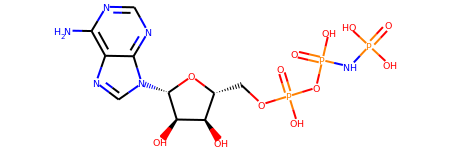

In [10]:
Chem.MolFromSmiles(ligands[0])

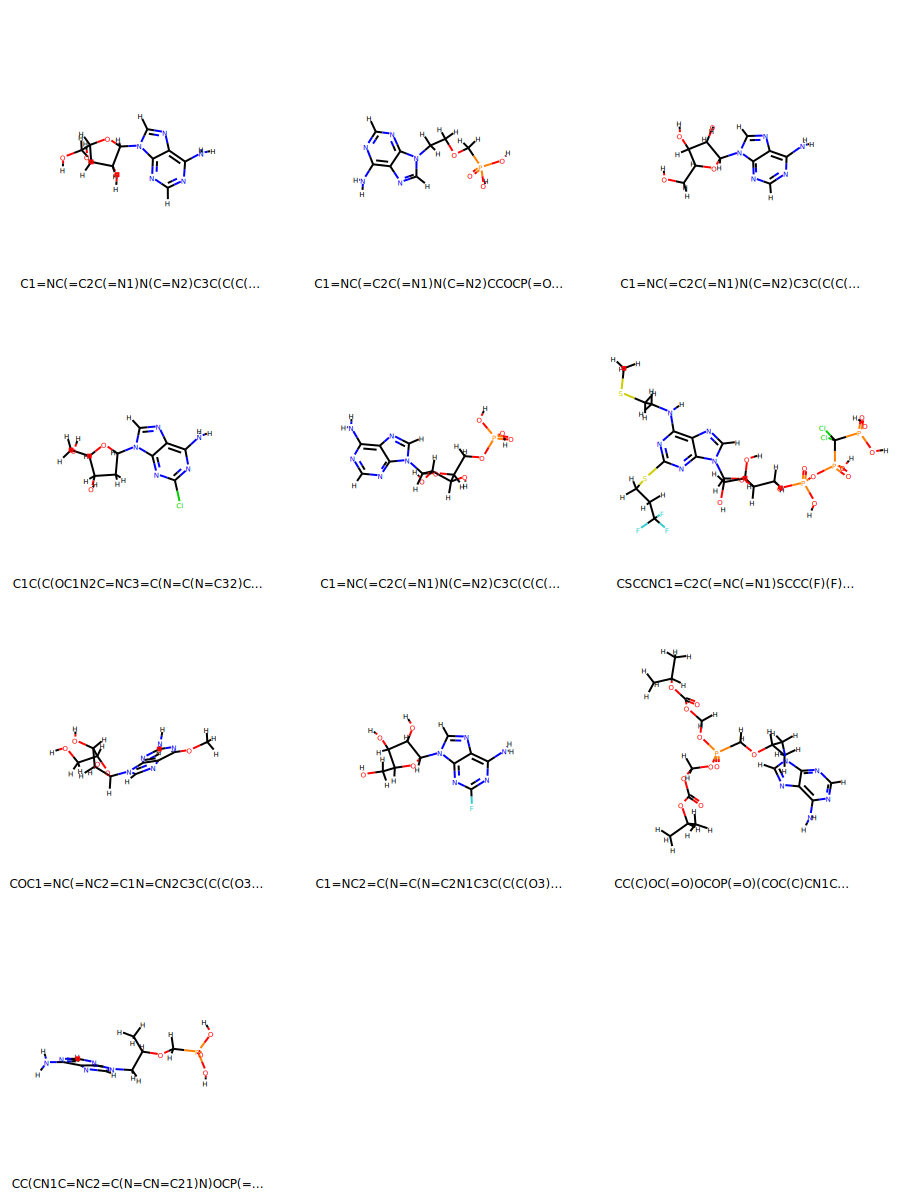

In [11]:
legends = [f"{s[:30]}..." for s in similar_smiles]  # shorten the smiles string to avoid text overlap
MolsToGridImage(rdkit_ligands, molsPerRow=3, subImgSize=(300, 300), maxMols=len(rdkit_ligands),
                legends=legends, useSVG=True)

## Case study: EGFR


EGFR is a kinase family involved in...

In [12]:
protein, ligands = step_01('EGFR')
similar_smiles, similar_molecules = step_02(ligands)

Chosen ERBB4 kinase with ID 409 from family EGFR


Write results to disk for the next part of the talktorial!

In [13]:
import os
os.makedirs('data', exist_ok=True)
with open('data/similar_smiles.txt', 'w') as f:
    f.write('\n'.join(similar_smiles))
with open('data/protein.mol2', 'w') as f:
    f.write(protein)

***

# Discussion

- TODO: Need some ideas here


***

# Quiz

- How many kinases does KLIFS provide for the "EGFR" family?
- Can you make the similarity search more strict?
- Is any of the proposed candidates already an approved inhibitor? (Hint: You can _scrape_ [PKIDB](http://www.icoa.fr/pkidb/) and check against the list of smiles)